Attribute Information :-

Period Covered

* Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observaions
* Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42 
* RH : Relative Humidity in %: 21 to 90 
* Ws :Wind speed in km/h: 6 to 29 
* Rain: total day in mm: 0 to 16.8 FWI Components

FWI Components

* Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
* Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9 
* Drought Code (DC) index from the FWI system: 7 to 220.4 
* Initial Spread Index (ISI) index from the FWI system: 0 to 18.5 
* Buildup Index (BUI) index from the FWI system: 1.1 to 68 
* Fire Weather Index (FWI) Index: 0 to 31.1
* Classes : We have two classes Fire and Not Fire (Categorical)
 and â€œnot Fireâ€

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

In [48]:
df=pd.read_csv('Algerian_forest_fires_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


# Data Cleaning

Every feature in an object have to convert them to numerical format and have to remove possible null values

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [50]:
df.shape

(247, 14)

In [51]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [52]:
print(df[df.isnull().any(axis=1)])
print(df[df.isnull().any(axis=1)].index)

                               day month  year Temperature   RH   Ws Rain   \
122                            NaN   NaN   NaN         NaN  NaN  NaN   NaN   
123  Sidi-Bel Abbes Region Dataset   NaN   NaN         NaN  NaN  NaN   NaN   
168                             14     7  2012          37   37   18   0.2   

     FFMC   DMC      DC   ISI   BUI      FWI Classes    
122   NaN   NaN     NaN   NaN   NaN      NaN       NaN  
123   NaN   NaN     NaN   NaN   NaN      NaN       NaN  
168  88.9  12.9  14.6 9  12.5  10.4  fire          NaN  
Index([122, 123, 168], dtype='int64')


We have null values in index 122, 123 and 168. Lets remove null values, before that actually this dataset contains data of two regions 0-122 index one region and 123-247 one region so let create a column called region and give 0 from 0 to 122 and 1 from 123-247

In [53]:
df.loc[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


In [54]:
df.loc[:121,'Region'] = 0
df.loc[124:,'Region'] = 1

Now leats drop the null rows

In [55]:
df.drop([122,123,124],inplace=True)

In [56]:
df.shape

(244, 15)

In [57]:
## Still we have one null row with null value in classes column at 168 index lets remove that too
df.dropna(inplace=True)

In [58]:
df.shape

(243, 15)

In [59]:
df.reset_index(inplace=True)

In [60]:
df.drop(columns='index',axis=1,inplace=True)

All the null values are removed, Now lets change the dtype of independent features

In [61]:
## Before that remove if there any extra spaces in column names
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [62]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [63]:
## As of now We don't need day,year and month columns we can remove that
df.drop(columns=['day','month','year'],axis=1,inplace=True)

In [64]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [65]:
## Lets change the dtype
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)
df[['Temperature', 'RH', 'Ws','Region','Classes']] = df[['Temperature', 'RH', 'Ws','Region','Classes']].astype(int)
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI',]] = df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI',]].astype(float)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int32  
 1   RH           243 non-null    int32  
 2   Ws           243 non-null    int32  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int32  
 11  Region       243 non-null    int32  
dtypes: float64(7), int32(5)
memory usage: 18.2 KB


# EDA

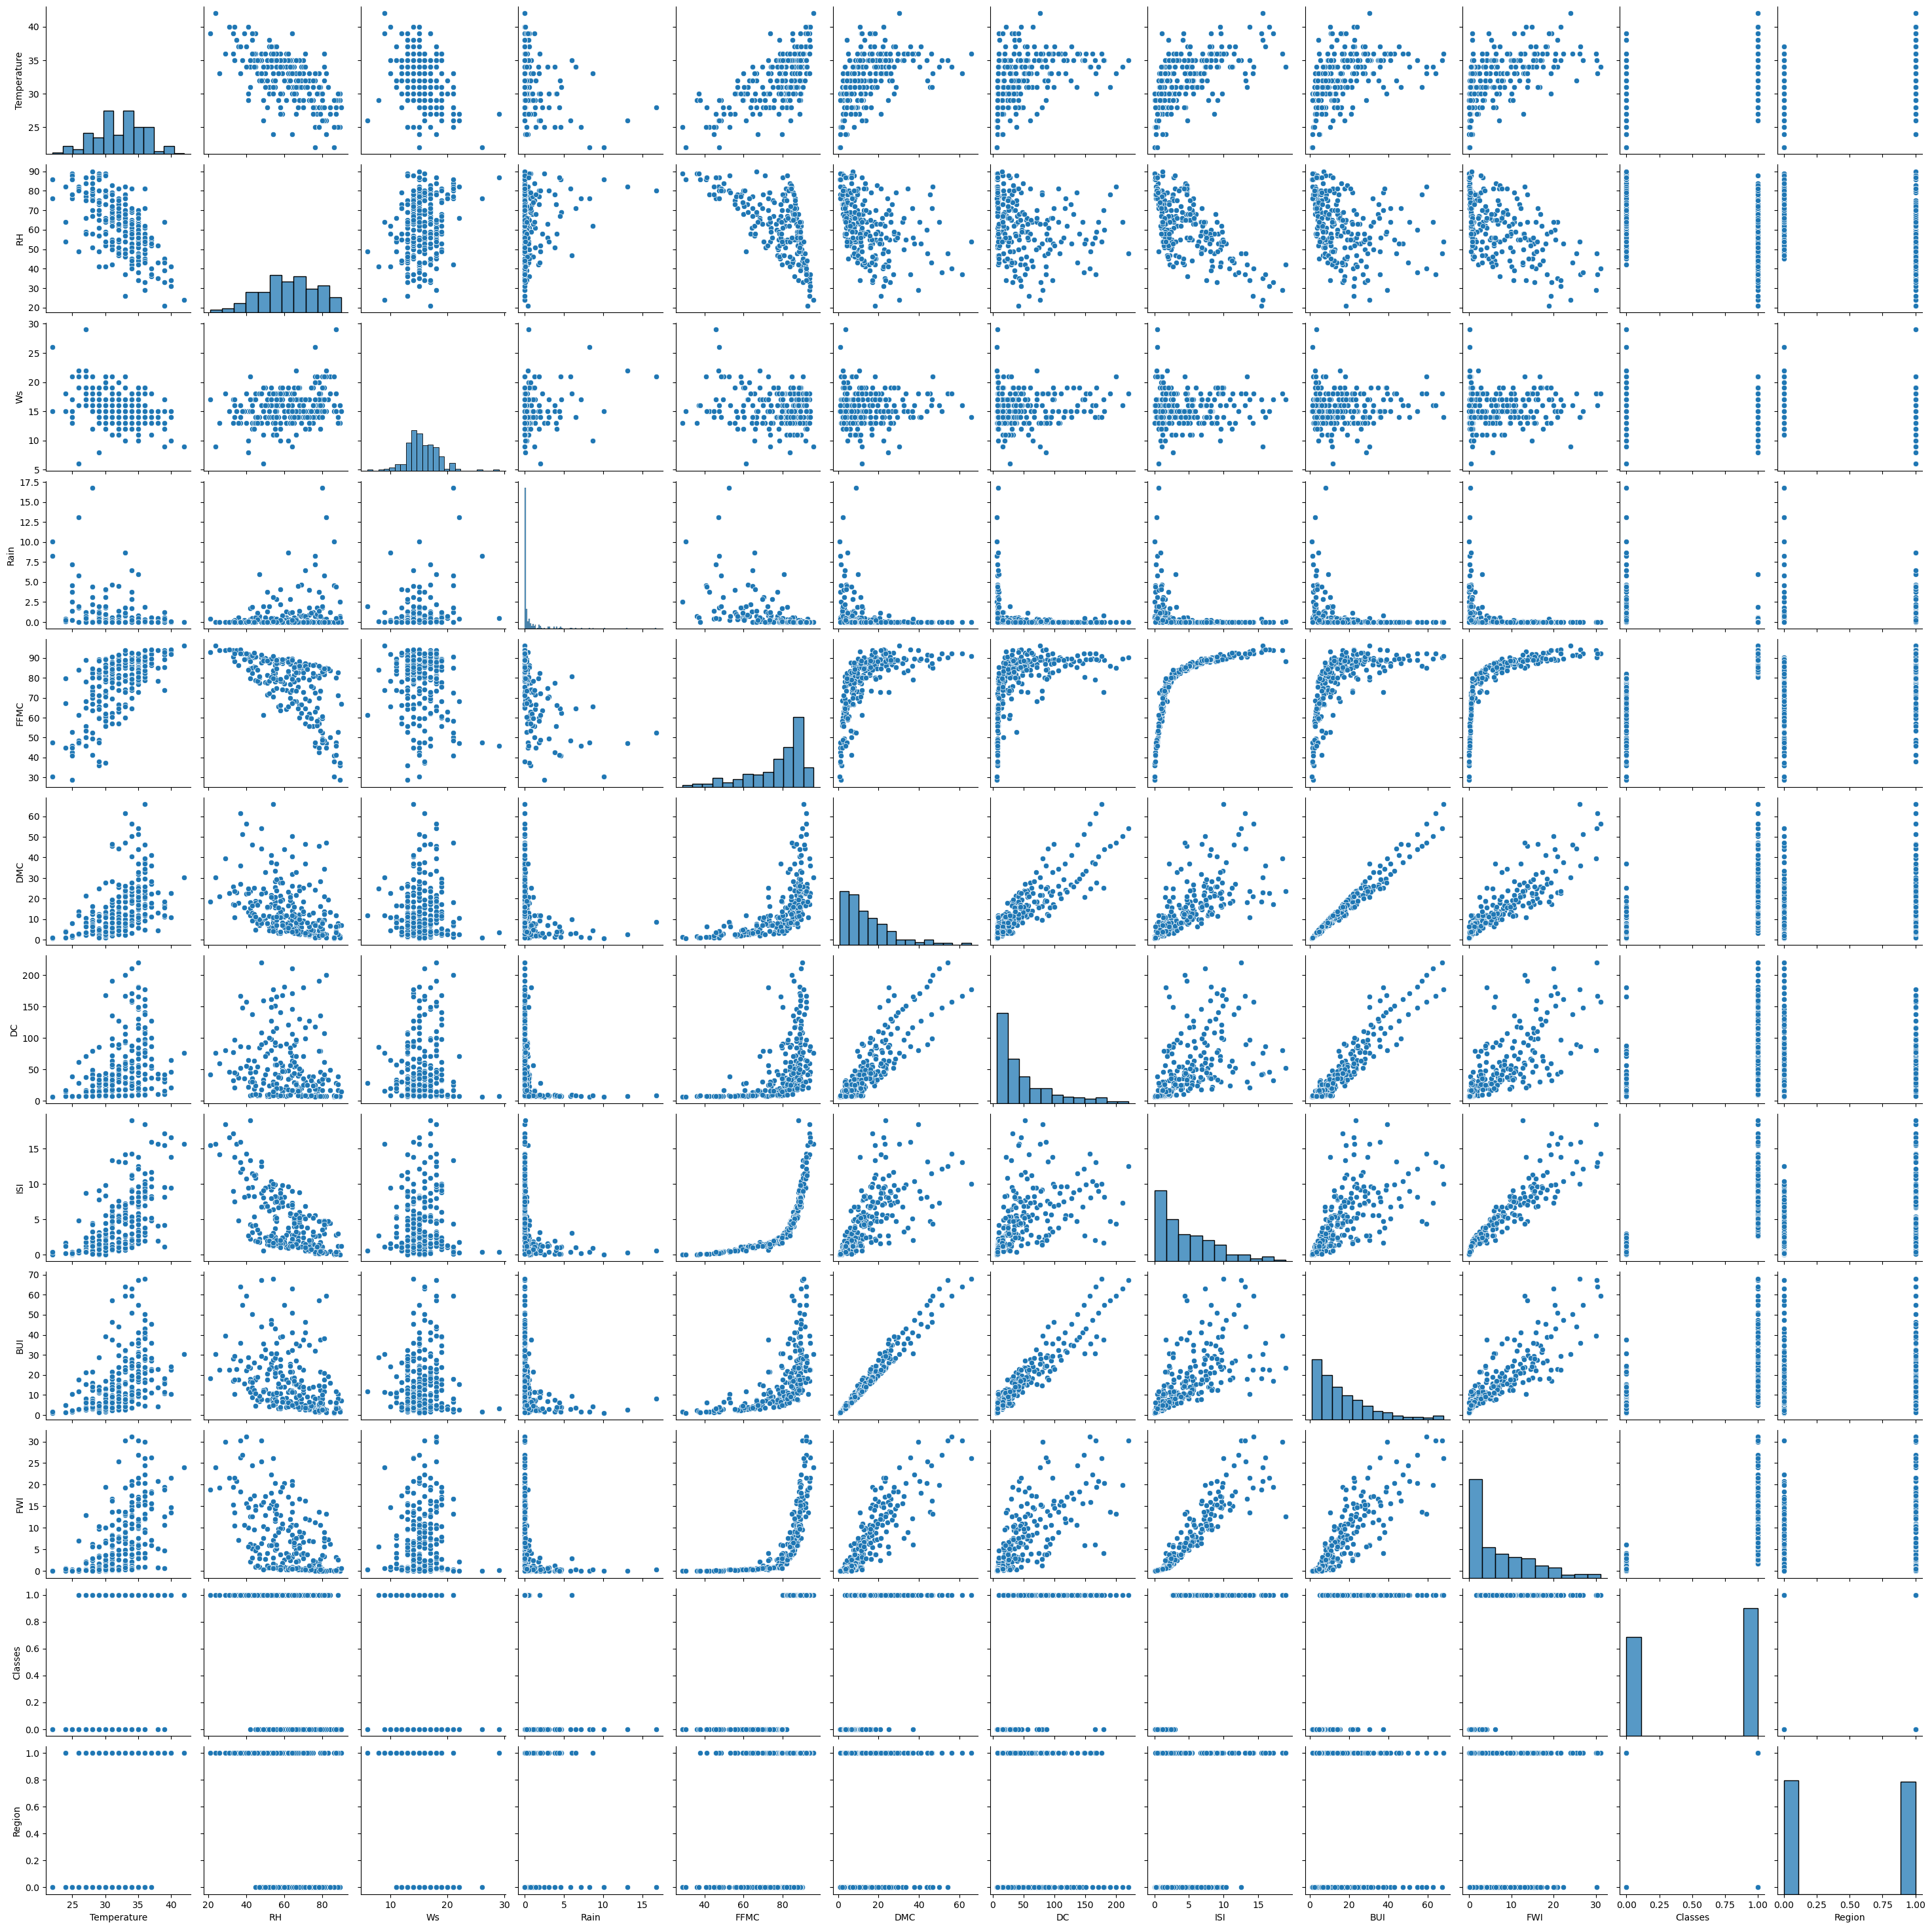

In [69]:
sns.pairplot(df)

<Axes: >

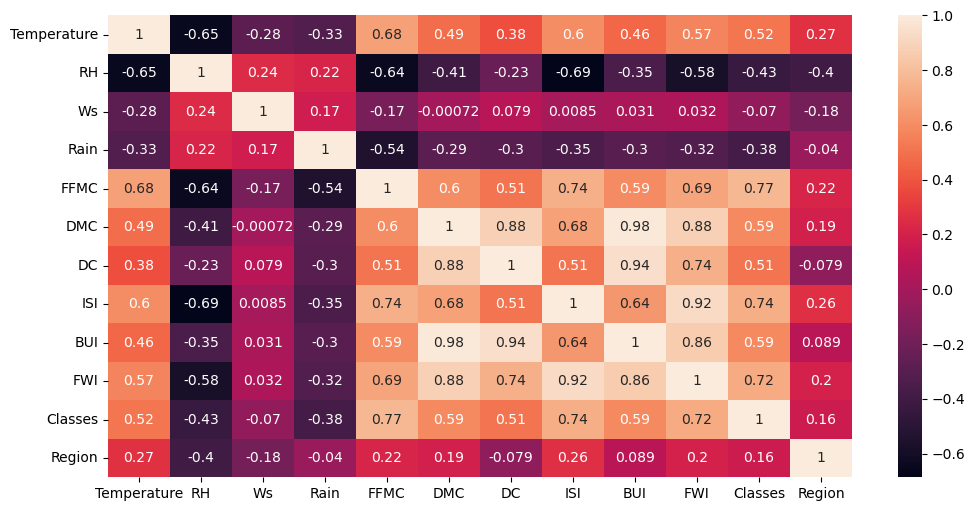

In [74]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

We see some Positive correlation and some negative correlation, and few variable are showing strong correlation* 

* RH is negatively corelated with Temperature, FFMC and ISI* 
Rain is negatively correlated with Temperature and FFMC,DMC, ISI and BUI

Text(0, 0.5, 'Temperature')

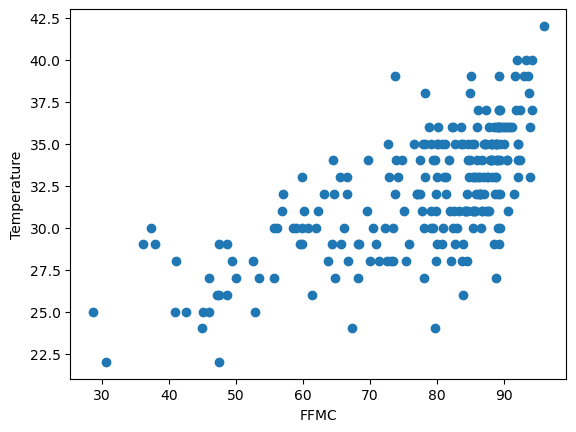

In [78]:
## We could observ some linerarity between Temp and FFMC
plt.scatter(df['FFMC'],df['Temperature'])
plt.xlabel("FFMC")
plt.ylabel("Temperature")

<Axes: xlabel='FFMC', ylabel='Temperature'>

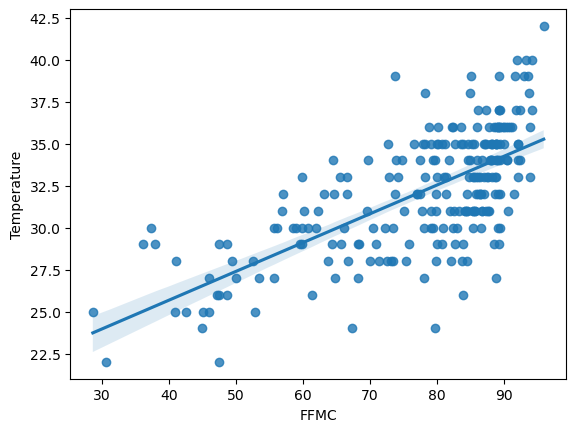

In [84]:
sns.regplot(x='FFMC',y='Temperature',data=df)

Text(0, 0.5, 'Temperature')

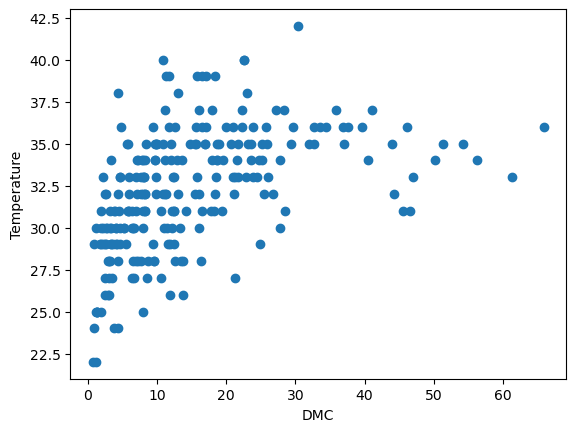

In [83]:
plt.scatter(df['DMC'],df['Temperature'])
plt.xlabel("DMC")
plt.ylabel("Temperature")

<Axes: xlabel='FWI', ylabel='Temperature'>

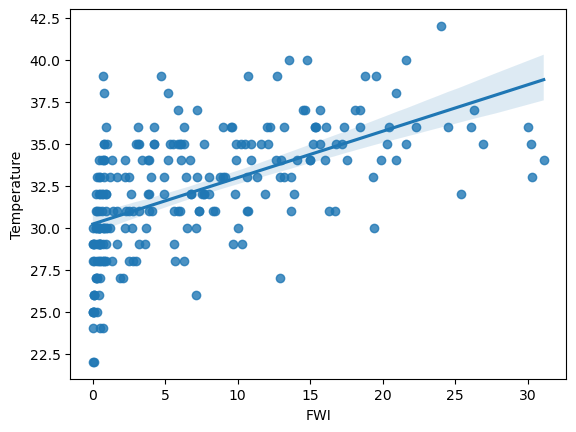

In [81]:
## assumpted best fit line would look like below when we plot between Temp and FWI
sns.regplot(x='FWI',y='Temperature',data=df)

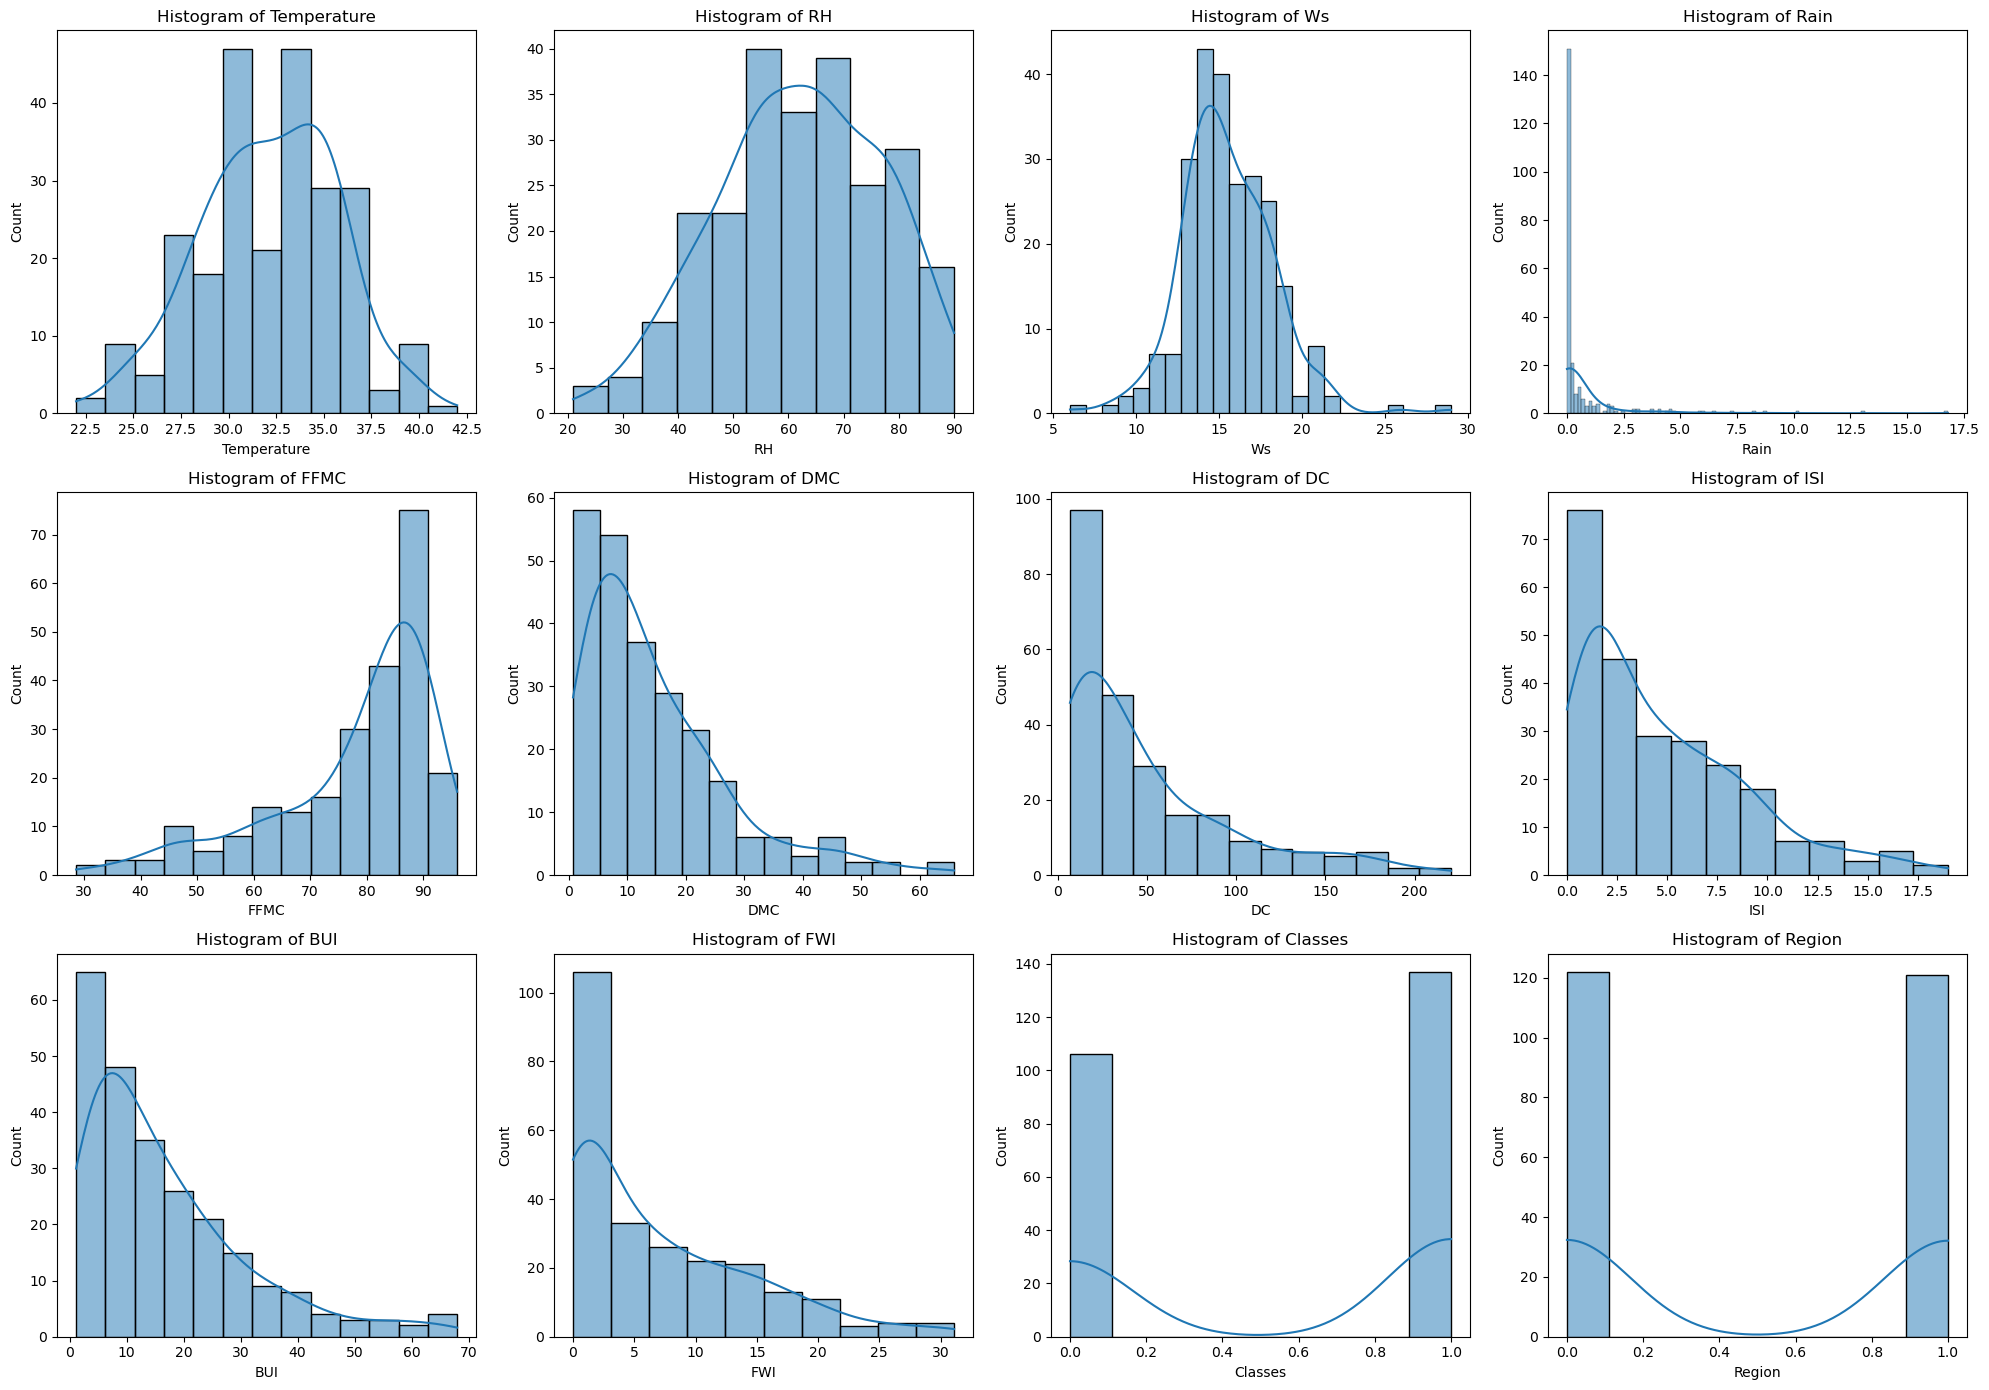

In [93]:
columns = list(df.columns)
n = len(columns)

plt.figure(figsize=(20, 14))

for i in range(n):
    plt.subplot(3, 4, i + 1)  
    sns.histplot(df[columns[i]], kde=True)
    plt.title(f'Histogram of {columns[i]}')

plt.tight_layout()
plt.show()


In the above we could see few features follwing right skewd distribution and few are following left skewed distribution and also some mimic normal distribution (Not Exactly)

In [96]:
## Lets see weather this data set is balanced or not
percentage=df['Classes'].value_counts(normalize=True)*100
percentage

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

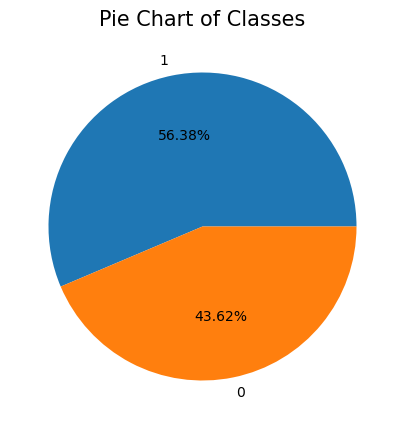

In [101]:
## plot a pie chart for visual representation
plt.figure(figsize=(5,5))
plt.pie(percentage,labels=percentage.index,autopct="%1.2f%%")
plt.title("Pie Chart of Classes",fontsize=15)
plt.show()

Looks Balanced dataset

<Axes: >

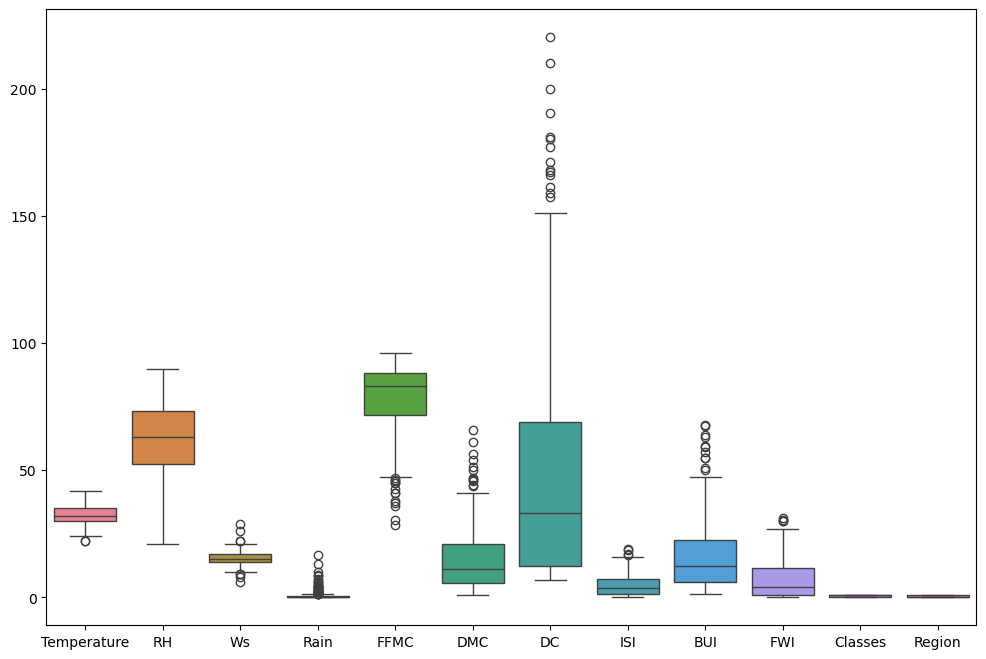

In [109]:
plt.figure(figsize=(12, 8))
sns.boxplot(data = df)

We Could observ some outliers in DMC, Rain,  FFMC, BUI and Ws also but we can ignore that as our dataset is so small

## Build the Linear Regression Model

In [113]:
## Split the data set
X = df.drop('FWI',axis=1)
y = df['FWI']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [114]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((182, 11), (61, 11), (182,), (61,))

In [115]:
scaler = StandardScaler()

In [131]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [132]:
lrefression = LinearRegression()

In [133]:
lrefression.fit(X_train_scaled,y_train)

LinearRegression()

In [134]:
print(f'Linear Regression Coefficient : {lrefression.coef_}')
print(f'Linear Regression Intercept : {lrefression.intercept_}')

Linear Regression Coefficient : [-6.08742794e-02 -1.76019852e-01 -6.93227982e-02  5.87019808e-04
 -8.83497419e-01  3.18981916e-03 -6.48363381e-01  5.04033269e+00
  4.27031281e+00  3.01209673e-01 -1.69104994e-01]
Linear Regression Intercept : 7.156043956043958


In [135]:
y_predict = lrefression.predict(X_test_scaled)

In [136]:
y_predict

array([ 8.31996412e+00,  7.45235640e+00, -8.27841406e-02,  5.16297204e+00,
        6.54064195e+00,  1.44543845e+00,  2.26547638e+00,  7.46300597e+00,
        1.92399106e+00,  3.18524625e+00,  7.39775428e-02,  5.94281376e+00,
        9.48344115e+00,  1.63845627e+01,  1.91363707e+01,  1.31652130e+00,
        2.08631652e+00, -2.96788725e-03,  6.76169290e+00,  3.14670707e+00,
        1.27353235e+00,  1.86197099e-01,  6.42186652e+00,  9.35012627e-02,
        2.10746623e+01,  5.00923944e+00,  5.87895763e+00,  9.98883439e+00,
        1.27612791e-01,  9.65513073e+00,  6.35241685e+00, -1.60871489e-01,
        1.02650479e+01,  1.50897365e+01,  1.29812593e+00,  6.24859348e-01,
        1.82949587e+00,  6.12102707e+00, -2.80701367e-01, -4.94849429e-01,
        7.03055056e+00,  1.57271366e+00,  8.45730189e+00, -3.51626222e-01,
        1.51365466e+01,  7.87828752e+00,  7.72962790e+00,  1.07804026e+00,
        1.24569975e+01,  8.41526407e-01,  2.85899477e+01,  5.43283120e+00,
        1.71859071e+01,  

In [137]:
mse = mean_squared_error(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)
r2 = r2_score(y_test,y_predict)
adjusted_r2 = (1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1))
print(f'Mean Squared Error : {mse}')
print(f'Mean Absolute Error : {mae}')
print(f'R 2 Square : {r2}')
print(f'Adjusted R 2 : {adjusted_r2}')

Mean Squared Error : 0.46982435716885296
Mean Absolute Error : 0.4654460800094099
R 2 Square : 0.98938502949221
Adjusted R 2 : 0.9870020769292367


In [138]:
## Aadjusted_r2 gives best result because it is not effected by features

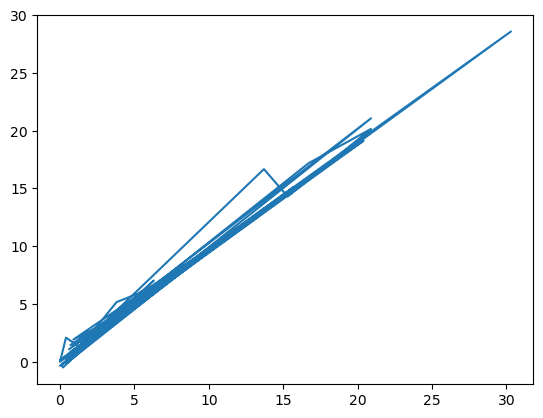

In [125]:
plt.plot(y_test,y_predict)

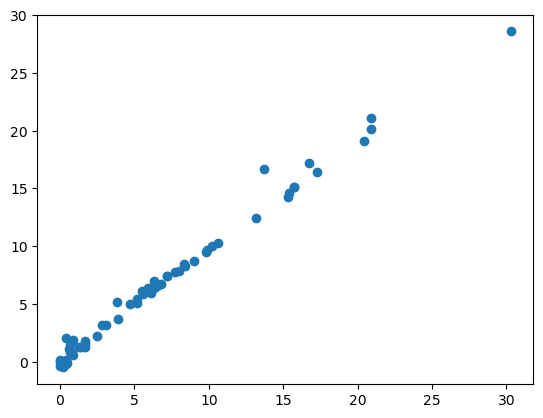

In [128]:
plt.scatter(y_test,y_predict)

<Axes: xlabel='FWI', ylabel='Density'>

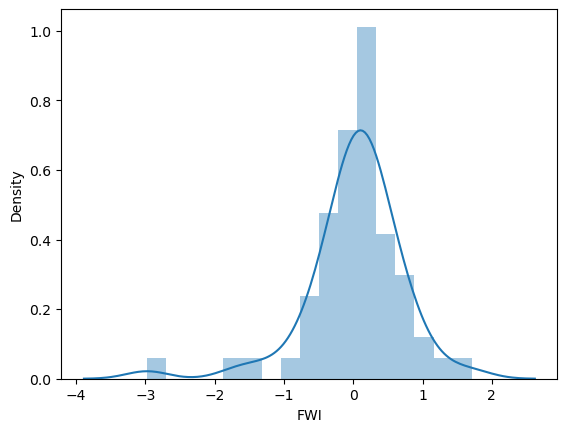

In [129]:
residuals = y_test - y_predict
sns.distplot(residuals)

## Looks our Model performing well and good